In [19]:
# Assume energy_df and temperature_df are loaded
energy_long = energy.melt(id_vars='State', var_name='Month', value_name='Energy_Consumption')
temperature_long = temperature.melt(id_vars='State', var_name='Month', value_name='Temperature')

# Check results
print(energy_long.head())
print(temperature_long.head())


         State   Month  Energy_Consumption
0       Alaska  Jan-24                 228
1      Arizona  Jan-24                2748
2   California  Jan-24                7549
3  Connecticut  Jan-24                1276
4      Florida  Jan-24               10196
         State   Month Temperature
0       Alaska  Jan-24          25
1      Arizona  Jan-24          73
2   California  Jan-24          77
3  Connecticut  Jan-24          55
4      Florida  Jan-24          87


In [20]:
# Merge based on State and Month
merged_df = pd.merge(energy_long, temperature_long, on=['State', 'Month'])

# Check merged data
merged_df.head()


,State,Month,Energy_Consumption,Temperature
0,Alaska,Jan-24,228,25
1,Arizona,Jan-24,2748,73
2,California,Jan-24,7549,77
3,Connecticut,Jan-24,1276,55
4,Florida,Jan-24,10196,87


In [22]:
# Convert 'Temperature' column to numeric, coercing errors to NaN
merged_df['Temperature'] = pd.to_numeric(merged_df['Temperature'], errors='coerce')

# Drop rows with NaN values in 'Temperature' or 'Energy_Consumption'
merged_df = merged_df.dropna(subset=['Temperature', 'Energy_Consumption'])

# Pearson correlation
corr_coeff, p_value = pearsonr(merged_df['Temperature'], merged_df['Energy_Consumption'])

print(f'Correlation Coefficient: {corr_coeff:.4f}')
print(f'P-value: {p_value:.4f}')

# Decision
if p_value < 0.05:
    print("Reject the null hypothesis: Significant correlation found!")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")

Correlation Coefficient: -0.0080
P-value: 0.8906
Fail to reject the null hypothesis: No significant correlation.


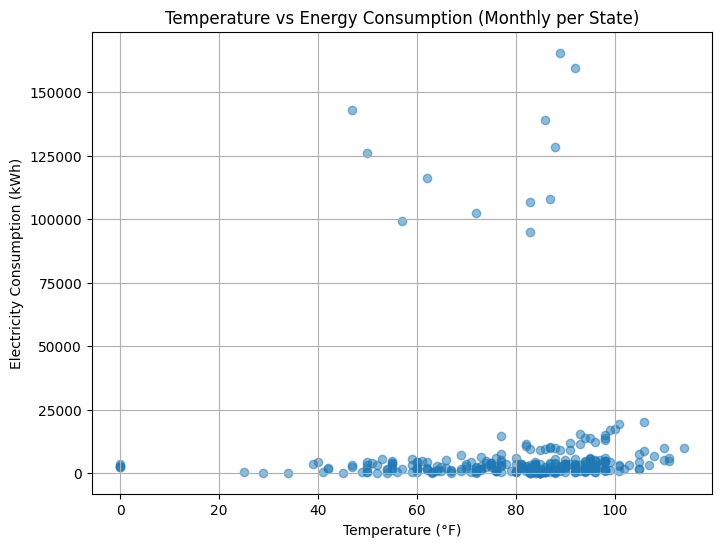

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(merged_df['Temperature'], merged_df['Energy_Consumption'], alpha=0.5)
plt.title('Temperature vs Energy Consumption (Monthly per State)')
plt.xlabel('Temperature (°F)')
plt.ylabel('Electricity Consumption (kWh)')
plt.grid(True)
plt.show()


Intercept: 8967.92
Slope: -10.33
R² score: 0.0001


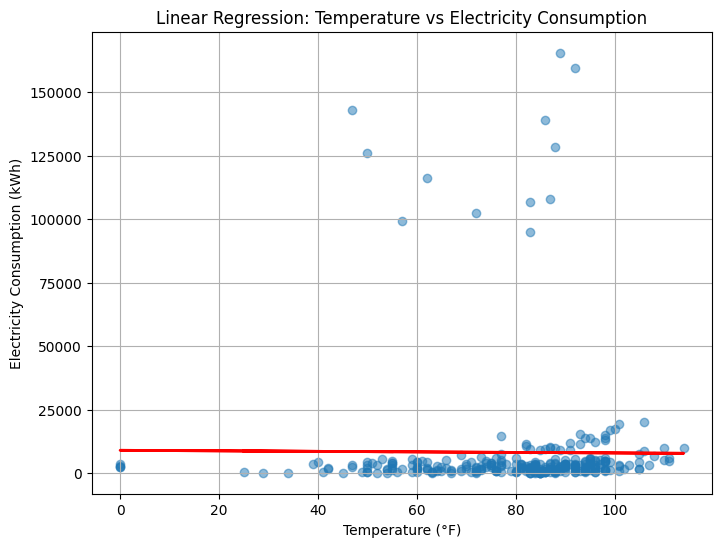

In [24]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare variables
X = merged_df[['Temperature']]  # Independent
y = merged_df['Energy_Consumption']  # Dependent

# Build model
model = LinearRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")
print(f"R² score: {model.score(X, y):.4f}")

# Plot with regression line
plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Linear Regression: Temperature vs Electricity Consumption')
plt.xlabel('Temperature (°F)')
plt.ylabel('Electricity Consumption (kWh)')
plt.grid(True)
plt.show()
